# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

Пусть $n$ — это размер батча, $C$ — параметр регуляризации, 
$\alpha$ - длина шага вдоль градиента.

$
L(\overline\omega)=
\frac{1}{n}\sum\limits_{i=1}^{n} (y_i-a_i)^2 + \frac{1}{C}\sum\limits_{i=1}^{D} {\omega_i}^2=
\frac{1}{n}\sum\limits_{i=1}^{n} (y_i- <\overline{x_i};\overline{\omega}> )^2 + \frac{1}{C}\sum\limits_{i=1}^{D} {\omega_i}^2
$

 $
\Longrightarrow \frac{\partial L}{\partial \omega_k}=
\frac{1}{n}\sum\limits_{i=1}^{n} 2(y_i- <\overline{x_i};\overline{\omega}> )(-x_{i,(k)}) + \frac{2}{C}\omega_k
$

$
\Longrightarrow 
\omega_{k}^{new}=\omega_{k}^{old}-\alpha\frac{\partial L}{\partial \omega_k}=
\omega_{k}^{old}+\alpha\frac{1}{n}\sum\limits_{i=1}^{n} 2(y_i- <\overline{x_i};\overline\omega^{old}> )x_{i,(k)} - \frac{2}{C}\omega_k^{old}
$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Пусть $n$ — это размер батча, $C$ — параметр регуляризации, 
$\alpha$ - длина шага вдоль градиента.

$L(\overline\omega)=-\frac{1}{n}\sum\limits_{i=1}^{n} 
[ y_i log(\sigma( <\overline x_{i} ; \overline\omega >))
+(1-y_i) log(1-\sigma( <\overline x_{i} ; \overline\omega >))]
+\frac{1}{C}\sum\limits_{i=1}^{D}\omega_i^{2} $

$\sigma(x)=\frac{1}{1+e^{-x}}$

$\frac {d\sigma(x)}{dx}=-\frac{1}{(1+e^{-x})^2}\cdot e^{-x} \cdot (-1)=
\frac{e^{-x}}{(1+e^{-x})^2}=\frac{e^{-x}+1-1}{(1+e^{-x})^2}
=\frac{1}{1+e^{-x}}-\frac{1}{(1+e^{-x})^2}
=\sigma(x)-\sigma^2(x)=\sigma(x)(1-\sigma(x))
$

$\frac{\partial L}{\partial \omega_k}=
-\frac{1}{n}\sum\limits_{i=1}^{n} 
[ y_i \frac{1}{\sigma( <\overline x_{i} ; \overline\omega >)}
 \cdot\sigma( <\overline x_{i} ; \overline\omega >)
 (1-\sigma( <\overline x_{i} ; \overline\omega >))x_{i,(k)}
 +(1-y_i)\frac{1}{(1-\sigma( <\overline x_{i} ; \overline\omega >))}
 \cdot (-1)\sigma( <\overline x_{i} ; \overline\omega >)
 (1-\sigma( <\overline x_{i} ; \overline\omega >))x_{i,(k)}] +\frac{2}{C}\omega_k
$

$\frac{\partial L}{\partial \omega_k} =
-\frac{1}{n}\sum\limits_{i=1}^{n} 
[ y_i (1-\sigma( <\overline x_{i} ; \overline\omega >))x_{i,(k)}
 -(1-y_i)\sigma( <\overline x_{i} ; \overline\omega >)x_{i,(k)}] +\frac{2}{C}\omega_k
=-\frac{1}{n}\sum\limits_{i=1}^{n} 
[x_{i,(k)}( y_i- \sigma( <\overline x_{i} ; \overline\omega >))] +\frac{2}{C}\omega_k
$

$\frac{\partial L}{\partial \omega_k} =
-\frac{1}{n}\sum\limits_{i=1}^{n} 
[x_{i,(k)}( y_i- \sigma( <\overline x_{i} ; \overline\omega >))] +\frac{2}{C}\omega_k
=-\frac{1}{n}\sum\limits_{i=1}^{n} 
[x_{i,(k)}( y_i -  a_i)] +\frac{2}{C}\omega_k$

То есть поличили точно такую же формулу, как в линейной регрессии, только там
$a_i=<\overline x_{i} ; \overline\omega >$,
а здесь $a_i=\sigma(<\overline x_{i} ; \overline\omega >)$.

$
\Longrightarrow 
\omega_{k}^{new}=\omega_{k}^{old}-\alpha\frac{\partial L}{\partial \omega_k}=
\omega_{k}^{old}+\alpha\frac{1}{n}\sum\limits_{i=1}^{n} (y_i- \sigma(<\overline{x_i};\overline\omega^{old}> ))x_{i,(k)} - \frac{2}{C}\omega_k^{old}
$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

$Q(\overline\omega)=
\frac{1}{N}(X \overline\omega-\overline y)^{T}(X \overline\omega-\overline y)
+\alpha\overline\omega^{T}\overline\omega$

$\Rightarrow \nabla_{\omega} Q(\overline\omega)
=\frac{1}{N}\nabla_{\omega}(\overline\omega^{T}X^{T}X\overline\omega-
\overline\omega^{T}X^{T}\overline y-\overline y^{T}X\overline\omega+y^{T}y)+2\alpha\omega
=\frac{1}{N}(X^{T}X+XX^{T}+2N\alpha)\overline\omega - \frac{2}{N}X^{T}\overline y$

Приравниваем градиент к нулю.

$\Rightarrow \frac{1}{N}(X^{T}X + \alpha N)\overline\omega=\frac{1}{N}X^{T}\overline y$

$\Rightarrow \overline\omega= ((X^{T}X + \alpha N))^{-1}X^{T}\overline y$

Мы видим, что введение параметра регуляризации гарантирует нам, что матрица, 
на которую умножается $\overline\omega$, будет обратима (даже если $X^{T}X$ само было необратимо),
то есть вектор весов однозначно находится.

Почему найден именно минимум:

$ \nabla_{\omega}(\nabla_{\omega} Q(\overline\omega))=2X^{T}X$

В случае, когда ранг матрицы $X$ полный, матрица $X^{T}X$ положительно определена:
$<X^{T}X\overline u, \overline u>=
<X\overline u, X\overline u> = <\overline v,\overline v> >0$
Здесь $\overline v=X\overline u$, и $<\overline v,\overline v> >0$, поскольку $X$  имеет полный ранг.

Или можно сказать так: матрица $X^TX$ положительно определена по критерию Сильвестра, 
потому что у нее все главные миноры положительны, потому что k-й главный 
минор — это матрица Грама первых k векторов, то есть объем параллелограма, натянутого на эти 
первые k векторов, и это не ноль, потому что они линейно независимы по условию.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$a(x_i)=\sigma( <\overline x_{i} ; \overline\omega >)$

$\sigma(x)=\frac{1}{1+e^{-x}}$

$\frac {d\sigma(x)}{dx}=-\frac{1}{(1+e^{-x})^2}\cdot e^{-x} \cdot (-1)=
\frac{e^{-x}}{(1+e^{-x})^2}=\frac{e^{-x}+1-1}{(1+e^{-x})^2}
=\frac{1}{1+e^{-x}}-\frac{1}{(1+e^{-x})^2}
=\sigma(x)-\sigma^2(x)=\sigma(x)(1-\sigma(x))
$

$\Rightarrow \frac{\partial E(L|x_i)}{\partial \omega_k} =
-p(y_i=1|x_i)\frac{1}{a(x_i)}a(x_i)(1-a(x_i))x_{i,(k)}
-p(y_i=0|x_i)\frac{1}{1-a(x_i)}(-1)a(x_i)(1-a(x_i))x_{i,(k)}
=-p(y_i=1|x_i)\frac{1}{a(x_i)}a(x_i)(1-a(x_i))x_{i,(k)}
-p(y_i=0|x_i)\frac{1}{1-a(x_i)}(-1)a(x_i)(1-a(x_i))x_{i,(k)}
=-p(y_i=1|x_i)(1-a(x_i))x_{i,(k)}
+p(y_i=0|x_i)a(x_i)x_{i,(k)}
=-p(y_i=1|x_i)(1-a(x_i))x_{i,(k)}
+(1-p(y_i=1|x_i)a(x_i)x_{i,(k)}
=x_{i,(k)}(a(x_i)-p(y_i=1|x_i))$

Приравнивая градиент к нулю, получаем $a(x_i)=p(y_i=1|x_i)$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нет, не нужно, в смысле что в слагаемом-регуляризации $\frac{1}{C}\sum\limits_{i=1}^{D}\omega_i^{2} $
сумма берется с $j=1$, а не $j=0$. А почему? Потому что регуляризация вводится для того, чтобы веса были не очень большими, то есть близкими к нулю; 
а от веса $w_0$ мы не хотим, чтобы он был близок к нулю, потому что 
без свободного члена у нас разделяющая плоскость будет все время проходить через ноль, 
а это сильное ограничение на положение нашей плоскости, и нам это не надо. 
Поэтому вкс $w_0$ НЕ надо включать в регуляризацию.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [227]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [228]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [229]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [230]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча (1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    if shuffle:
        X, y = sklearn.utils.shuffle(X, y)

    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i : i + batch_size]
        y_batch = y[i : i + batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [8]:
#%%pycodestyle
import sklearn
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    return 1 / (1 + np.exp(-x))


class MySGDClassifier(BaseEstimator, ClassifierMixin):


    def __init__(self, batch_generator, C=1, alpha=0.01, 
                 max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.weights = None
    
    def __a(self, X):
        
        y_hat = X @ self.weights

        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)

        return y_hat
    
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss = None

        if self.model_type == 'lin_reg':
            pred = self.__a(X_batch)
            loss = (pred - y_batch) ** 2
            loss = np.mean(loss, axis=0) + self.weights[1:].T @ self.weights[1:] / self.C
        elif self.model_type == 'log_reg':
            pred = self.__a(X_batch)
            loss = -(y_batch * np.log(pred) + (1 - y_batch) * np.log(1 - pred))
            loss = np.mean(loss, axis=0) + self.weights[1:].T @ self.weights[1:] / self.C

        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        loss_grad = None

        if self.model_type == 'lin_reg':
            pred = self.__a(X_batch)
            reg = 2 * self.weights / self.C
            reg[0] = 0
            loss_grad = 2 * X_batch.T @ (pred - y_batch) / X_batch.shape[0] + reg
        elif self.model_type == 'log_reg':
            pred = self.__a(X_batch)
            reg = 2 * self.weights / self.C
            reg[0] = 0
            loss_grad = X_batch.T @ (pred - y_batch) / X_batch.shape[0] + reg

        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weights = self.weights - self.alpha * new_grad
    
    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        np.random.seed()
        self.weights = np.random.randn(X.shape[1]).astype(np.longdouble)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]

                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)

                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        y_hat = X @ self.weights

        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)

        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [6]:
def plot_decision_boundary(clf):
    print("Weigths = ", clf.weights)
    x = [-4, 8]
    y = np.array([
        clf.weights[0] + clf.weights[1] * x[0],
        clf.weights[0] + clf.weights[1] * x[1]
    ])
    plt.plot(x, y)


Weigths =  [-2.79464015  0.72094559 -0.61083984]


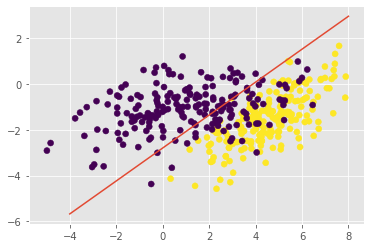

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

model = MySGDClassifier(batch_generator, model_type='log_reg', C=100, max_epoch=1000)
model.fit(X, y, batch_size=100)

plot_decision_boundary(model)
plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
X.shape

(100000, 10)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [ ]:
## Your Code Here

In [12]:
lin = {}
log = {}
alphas = [0.1, 0.01, 0.001, 0.0001]
for alpha in alphas:
    model = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=alpha)
    model.fit(X, y, batch_size=100)
    lin[alpha] = model.errors_log

    model = MySGDClassifier(batch_generator, model_type='log_reg', alpha=alpha)
    model.fit(X, y, batch_size=100)
    log[alpha] = model.errors_log

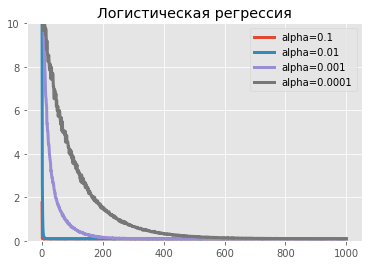

In [15]:
plt.title('Логистическая регрессия')
for alpha in alphas:
    plt.ylim([0, 10])
    plt.plot(np.arange(1, 1001, 1), 
             np.mean(np.array(lin[alpha]['loss']).reshape(1000, 10), axis=1), 
             label='alpha={}'.format(alpha),
             linewidth=3)
plt.legend()

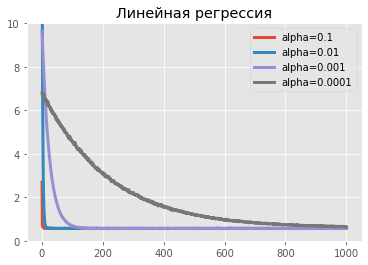

In [16]:
plt.title('Линейная регрессия')
for alpha in alphas:
    plt.ylim([0, 10])
    plt.plot(np.arange(1, 1001, 1), 
             np.mean(np.array(log[alpha]['loss']).reshape(1000, 10), axis=1), 
             label='alpha={}'.format(alpha), 
             linewidth=3)
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Очевидно, что в обоих случаях при большом шаге alpha модель сходится быстрее, чем при меньших. Однако, в других задачах уменьшение шага может помочь более точно отыскать минимум при более долгой сходимости

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [17]:
np.logspace(3, -3, 10)

array([1.00000000e+03, 2.15443469e+02, 4.64158883e+01, 1.00000000e+01,
       2.15443469e+00, 4.64158883e-01, 1.00000000e-01, 2.15443469e-02,
       4.64158883e-03, 1.00000000e-03])

In [20]:
weights_lin = []
weights_log = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(
        batch_generator,
        model_type='lin_reg',
        alpha=0.0001,
        max_epoch=10,
        C=C)
    model.fit(X, y, batch_size=1000)
    weights_lin.append(model.weights[1:].mean())

    model = MySGDClassifier(
        batch_generator,
        model_type='log_reg',
        alpha=0.0001,
        max_epoch=10,
        C=C)
    model.fit(X, y, batch_size=1000)
    weights_log.append(model.weights[1:].mean())

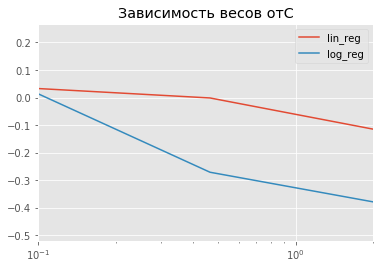

In [31]:
plt.title("Зависимость весов отС")
plt.xscale('log')
plt.xlim([0.1, 2])
plt.plot(np.logspace(3, -3, 10), weights_lin, label='lin_reg')
plt.plot(np.logspace(3, -3, 10), weights_log, label='log_reg')
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Да, веса уменьшились.

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [32]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [33]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [34]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [35]:
X_train

array([[4, 4, 3, ..., 2, 1, 1],
       [8, 7, 7, ..., 2, 2, 2],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 2, 1, ..., 1, 1, 1],
       [3, 2, 2, ..., 1, 1, 1]])

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [36]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
X_train = StandardScaler().fit_transform(X=X_train)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [ ]:
def get_mean_f1score(X_train,y_train,groups_train,model,*args,**kwargs):
    group_kfold = GroupKFold(n_splits=5)
    mas=[]
    for train_index, val_index in group_kfold.split(X_train, y_train, groups_train):
        #print("TRAIN:", train_index, "TEST:", val_index)
        X_train_train, X_train_val = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
        y_train_train, y_train_val = y_train[train_index], y_train[val_index]
        #print(X_train_train, X_train_test, y_train_train, y_train_test)
        #clf=XGBClassifier(*args,**kwargs) #mean f1_score=0.53
        clf=model(*args,**kwargs)
        clf.fit(X_train_train,y_train_train)
        y_pred_val=clf.predict(X_train_val)
        mas.append(f1_score(y_train_val,y_pred_val))
    return np.mean(mas)
    

In [38]:
X_training, X_test, y_training, y_test = train_test_split(X_train, y_train, stratify=y_train)
parameters_lin = pd.DataFrame(columns=['alpha', 'C', 'max_epoch', 'batch_size', 'score', 'threshold'])
parameters_log = pd.DataFrame(columns=['alpha', 'C', 'max_epoch', 'batch_size', 'score', 'threshold'])

In [39]:
i = 0
for max_epoch in [1, 10, 50, 100, 200]:
    for alpha in [0.1, 0.01, 0.001, 0.0001]:
        for C in [1000, 100, 10, 1, 0.1, 0.01]:
            for batch_size in [10, 100, 1000, 10000]:

                lin_model = MySGDClassifier(
                    batch_generator, 
                    C=C, 
                    alpha=alpha, 
                    max_epoch=max_epoch, 
                    model_type='lin_reg')

                lin_model.fit(X_training, y_training, batch_size=batch_size)
                threshold = None
                score_f1 = 0
                pred = lin_model.predict(X_test)
                for thres in np.linspace(0, 1, 1000, endpoint=False):
                    score = f1_score(y_test,  pred > thres)
                    if score > score_f1:
                        score_f1 = score
                        threshold = thres

                parameters_lin = parameters_lin.append({
                    'alpha': alpha,
                    'C': C,
                    'max_epoch': max_epoch,
                    'batch_size': batch_size,
                    'score': score_f1,
                    'threshold': threshold
                }, ignore_index=True)

                print(parameters_lin.loc[[i]])

                log_model = MySGDClassifier(
                    batch_generator, 
                    C=C, 
                    alpha=alpha, 
                    max_epoch=max_epoch, 
                    model_type='log_reg')

                log_model.fit(X_training, y_training, batch_size=batch_size)
                threshold = None
                score_f1 = 0
                pred = log_model.predict(X_test)
                for thres in np.linspace(0, 1, 1000, endpoint=False):
                    score = f1_score(y_test, pred > thres)
                    if score > score_f1:
                        score_f1 = score
                        threshold = thres

                parameters_log = parameters_log.append({
                    'alpha': alpha,
                    'C': C,
                    'max_epoch': max_epoch,
                    'batch_size': batch_size,
                    'score': score_f1,
                    'threshold': threshold
                }, ignore_index=True)
                print(parameters_log.loc[[i]])
                i += 1

   alpha       C  max_epoch  batch_size     score  threshold
0    0.1  1000.0        1.0        10.0  0.169848        0.0


/Users/aleksandra/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


   alpha       C  max_epoch  batch_size     score  threshold
0    0.1  1000.0        1.0        10.0  0.622531      0.263
   alpha       C  max_epoch  batch_size     score  threshold
1    0.1  1000.0        1.0       100.0  0.618975        0.0
   alpha       C  max_epoch  batch_size     score  threshold
1    0.1  1000.0        1.0       100.0  0.584034      0.416
   alpha       C  max_epoch  batch_size     score  threshold
2    0.1  1000.0        1.0      1000.0  0.620337        0.0
   alpha       C  max_epoch  batch_size     score  threshold
2    0.1  1000.0        1.0      1000.0  0.592029       0.25
   alpha       C  max_epoch  batch_size     score  threshold
3    0.1  1000.0        1.0     10000.0  0.610429      0.002
   alpha       C  max_epoch  batch_size     score  threshold
3    0.1  1000.0        1.0     10000.0  0.446452        0.0
   alpha      C  max_epoch  batch_size     score  threshold
4    0.1  100.0        1.0        10.0  0.618373        0.0
   alpha      C  max_epoch

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in multiply


    alpha    C  max_epoch  batch_size     score  threshold
16    0.1  0.1        1.0        10.0  0.627554      0.997
    alpha    C  max_epoch  batch_size     score  threshold
17    0.1  0.1        1.0       100.0  0.175066        0.0
    alpha    C  max_epoch  batch_size     score  threshold
17    0.1  0.1        1.0       100.0  0.626772      0.834
    alpha    C  max_epoch  batch_size     score  threshold
18    0.1  0.1        1.0      1000.0  0.619733        0.0
    alpha    C  max_epoch  batch_size     score  threshold
18    0.1  0.1        1.0      1000.0  0.593229      0.515
    alpha    C  max_epoch  batch_size     score  threshold
19    0.1  0.1        1.0     10000.0  0.185805      0.083
    alpha    C  max_epoch  batch_size     score  threshold
19    0.1  0.1        1.0     10000.0  0.446452        0.0
    alpha     C  max_epoch  batch_size     score  threshold
20    0.1  0.01        1.0        10.0  0.620337        0.0


/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


    alpha     C  max_epoch  batch_size     score  threshold
20    0.1  0.01        1.0        10.0  0.214286        0.0
    alpha     C  max_epoch  batch_size     score  threshold
21    0.1  0.01        1.0       100.0  0.619733        0.0
    alpha     C  max_epoch  batch_size     score  threshold
21    0.1  0.01        1.0       100.0  0.179162        0.0
    alpha     C  max_epoch  batch_size     score  threshold
22    0.1  0.01        1.0      1000.0  0.191497        0.0
    alpha     C  max_epoch  batch_size     score  threshold
22    0.1  0.01        1.0      1000.0  0.480635        0.0
    alpha     C  max_epoch  batch_size     score  threshold
23    0.1  0.01        1.0     10000.0  0.618883      0.997
    alpha     C  max_epoch  batch_size    score  threshold
23    0.1  0.01        1.0     10000.0  0.51357      0.001
    alpha       C  max_epoch  batch_size     score  threshold
24   0.01  1000.0        1.0        10.0  0.554017       0.35
    alpha       C  max_epoch  batch_si

    alpha      C  max_epoch  batch_size     score  threshold
54  0.001  100.0        1.0      1000.0  0.446452        0.0
    alpha      C  max_epoch  batch_size     score  threshold
55  0.001  100.0        1.0     10000.0  0.601024      0.974
    alpha      C  max_epoch  batch_size     score  threshold
55  0.001  100.0        1.0     10000.0  0.446452        0.0
    alpha     C  max_epoch  batch_size     score  threshold
56  0.001  10.0        1.0        10.0  0.475767      0.016
    alpha     C  max_epoch  batch_size     score  threshold
56  0.001  10.0        1.0        10.0  0.490296      0.792
    alpha     C  max_epoch  batch_size     score  threshold
57  0.001  10.0        1.0       100.0  0.429455      0.014
    alpha     C  max_epoch  batch_size     score  threshold
57  0.001  10.0        1.0       100.0  0.446452        0.0
    alpha     C  max_epoch  batch_size     score  threshold
58  0.001  10.0        1.0      1000.0  0.616915        0.0
    alpha     C  max_epoch  batch_

     alpha    C  max_epoch  batch_size     score  threshold
88  0.0001  0.1        1.0        10.0  0.477567       0.78
     alpha    C  max_epoch  batch_size     score  threshold
89  0.0001  0.1        1.0       100.0  0.084011        0.0
     alpha    C  max_epoch  batch_size     score  threshold
89  0.0001  0.1        1.0       100.0  0.446452        0.0
     alpha    C  max_epoch  batch_size     score  threshold
90  0.0001  0.1        1.0      1000.0  0.097665        0.0
     alpha    C  max_epoch  batch_size     score  threshold
90  0.0001  0.1        1.0      1000.0  0.446452        0.0
     alpha    C  max_epoch  batch_size     score  threshold
91  0.0001  0.1        1.0     10000.0  0.613233      0.677
     alpha    C  max_epoch  batch_size    score  threshold
91  0.0001  0.1        1.0     10000.0  0.51186      0.168
     alpha     C  max_epoch  batch_size     score  threshold
92  0.0001  0.01        1.0        10.0  0.446452        0.0
     alpha     C  max_epoch  batch_size 

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in square
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in longdouble_scalars
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in matmul


     alpha    C  max_epoch  batch_size     score  threshold
112    0.1  0.1       10.0        10.0  0.621047        0.0
     alpha    C  max_epoch  batch_size     score  threshold
112    0.1  0.1       10.0        10.0  0.422083        0.0
     alpha    C  max_epoch  batch_size    score  threshold
113    0.1  0.1       10.0       100.0  0.61966        0.0
     alpha    C  max_epoch  batch_size     score  threshold
113    0.1  0.1       10.0       100.0  0.446452        0.0
     alpha    C  max_epoch  batch_size     score  threshold
114    0.1  0.1       10.0      1000.0  0.620051        0.0
     alpha    C  max_epoch  batch_size     score  threshold
114    0.1  0.1       10.0      1000.0  0.446452        0.0
     alpha    C  max_epoch  batch_size     score  threshold
115    0.1  0.1       10.0     10000.0  0.178397        0.0
     alpha    C  max_epoch  batch_size     score  threshold
115    0.1  0.1       10.0     10000.0  0.613676      0.363


/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in true_divide
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in matmul
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in matmul
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in matmul


     alpha     C  max_epoch  batch_size  score  threshold
116    0.1  0.01       10.0        10.0    0.0        NaN


/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in matmul
/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in true_divide


     alpha     C  max_epoch  batch_size  score  threshold
116    0.1  0.01       10.0        10.0    0.0        NaN
     alpha     C  max_epoch  batch_size     score  threshold
117    0.1  0.01       10.0       100.0  0.619733        0.0
     alpha     C  max_epoch  batch_size     score  threshold
117    0.1  0.01       10.0       100.0  0.626059        0.0
     alpha     C  max_epoch  batch_size     score  threshold
118    0.1  0.01       10.0      1000.0  0.178397        0.0
     alpha     C  max_epoch  batch_size     score  threshold
118    0.1  0.01       10.0      1000.0  0.559455        0.0
     alpha     C  max_epoch  batch_size     score  threshold
119    0.1  0.01       10.0     10000.0  0.604126        0.0
     alpha     C  max_epoch  batch_size    score  threshold
119    0.1  0.01       10.0     10000.0  0.49071        0.0
     alpha       C  max_epoch  batch_size     score  threshold
120   0.01  1000.0       10.0        10.0  0.628125      0.289
     alpha       C  max_epoc

     alpha      C  max_epoch  batch_size     score  threshold
150  0.001  100.0       10.0      1000.0  0.393638      0.006
     alpha      C  max_epoch  batch_size     score  threshold
150  0.001  100.0       10.0      1000.0  0.596165      0.532
     alpha      C  max_epoch  batch_size    score  threshold
151  0.001  100.0       10.0     10000.0  0.60495      0.977
     alpha      C  max_epoch  batch_size    score  threshold
151  0.001  100.0       10.0     10000.0  0.59276      0.542
     alpha     C  max_epoch  batch_size     score  threshold
152  0.001  10.0       10.0        10.0  0.613281      0.267
     alpha     C  max_epoch  batch_size     score  threshold
152  0.001  10.0       10.0        10.0  0.632687      0.293
     alpha     C  max_epoch  batch_size     score  threshold
153  0.001  10.0       10.0       100.0  0.485465      0.509
     alpha     C  max_epoch  batch_size     score  threshold
153  0.001  10.0       10.0       100.0  0.549133      0.599
     alpha     C  ma

      alpha    C  max_epoch  batch_size     score  threshold
183  0.0001  1.0       10.0     10000.0  0.446452        0.0
      alpha    C  max_epoch  batch_size    score  threshold
184  0.0001  0.1       10.0        10.0  0.62848      0.466
      alpha    C  max_epoch  batch_size     score  threshold
184  0.0001  0.1       10.0        10.0  0.626532      0.334
      alpha    C  max_epoch  batch_size     score  threshold
185  0.0001  0.1       10.0       100.0  0.446452        0.0
      alpha    C  max_epoch  batch_size     score  threshold
185  0.0001  0.1       10.0       100.0  0.446452        0.0
      alpha    C  max_epoch  batch_size     score  threshold
186  0.0001  0.1       10.0      1000.0  0.109244      0.062
      alpha    C  max_epoch  batch_size     score  threshold
186  0.0001  0.1       10.0      1000.0  0.446452        0.0
      alpha    C  max_epoch  batch_size     score  threshold
187  0.0001  0.1       10.0     10000.0  0.618536      0.295
      alpha    C  max_epoc

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


     alpha       C  max_epoch  batch_size     score  threshold
192    0.1  1000.0       50.0        10.0  0.614946        0.0
     alpha       C  max_epoch  batch_size     score  threshold
192    0.1  1000.0       50.0        10.0  0.627778      0.297
     alpha       C  max_epoch  batch_size     score  threshold
193    0.1  1000.0       50.0       100.0  0.617334        0.0
     alpha       C  max_epoch  batch_size     score  threshold
193    0.1  1000.0       50.0       100.0  0.626572      0.288
     alpha       C  max_epoch  batch_size     score  threshold
194    0.1  1000.0       50.0      1000.0  0.620051        0.0
     alpha       C  max_epoch  batch_size     score  threshold
194    0.1  1000.0       50.0      1000.0  0.607991      0.286
     alpha       C  max_epoch  batch_size     score  threshold
195    0.1  1000.0       50.0     10000.0  0.178397        0.0
     alpha       C  max_epoch  batch_size     score  threshold
195    0.1  1000.0       50.0     10000.0  0.583824    

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in add


     alpha     C  max_epoch  batch_size  score  threshold
212    0.1  0.01       50.0        10.0    0.0        NaN
     alpha     C  max_epoch  batch_size  score  threshold
212    0.1  0.01       50.0        10.0    0.0        NaN
     alpha     C  max_epoch  batch_size  score  threshold
213    0.1  0.01       50.0       100.0    0.0        NaN
     alpha     C  max_epoch  batch_size  score  threshold
213    0.1  0.01       50.0       100.0    0.0        NaN
     alpha     C  max_epoch  batch_size     score  threshold
214    0.1  0.01       50.0      1000.0  0.619733        0.0
     alpha     C  max_epoch  batch_size     score  threshold
214    0.1  0.01       50.0      1000.0  0.186331        0.0
     alpha     C  max_epoch  batch_size     score  threshold
215    0.1  0.01       50.0     10000.0  0.619733        0.0
     alpha     C  max_epoch  batch_size     score  threshold
215    0.1  0.01       50.0     10000.0  0.181749        0.0
     alpha       C  max_epoch  batch_size     sc

     alpha      C  max_epoch  batch_size     score  threshold
246  0.001  100.0       50.0      1000.0  0.453316      0.914
     alpha      C  max_epoch  batch_size     score  threshold
246  0.001  100.0       50.0      1000.0  0.446571      0.003
     alpha      C  max_epoch  batch_size     score  threshold
247  0.001  100.0       50.0     10000.0  0.444505      0.289
     alpha      C  max_epoch  batch_size     score  threshold
247  0.001  100.0       50.0     10000.0  0.451493      0.179
     alpha     C  max_epoch  batch_size     score  threshold
248  0.001  10.0       50.0        10.0  0.628904      0.301
     alpha     C  max_epoch  batch_size    score  threshold
248  0.001  10.0       50.0        10.0  0.62955      0.287
     alpha     C  max_epoch  batch_size    score  threshold
249  0.001  10.0       50.0       100.0  0.57998      0.285
     alpha     C  max_epoch  batch_size     score  threshold
249  0.001  10.0       50.0       100.0  0.605991      0.481
     alpha     C  ma

      alpha    C  max_epoch  batch_size     score  threshold
279  0.0001  1.0       50.0     10000.0  0.491132      0.715
      alpha    C  max_epoch  batch_size     score  threshold
280  0.0001  0.1       50.0        10.0  0.628143      0.304
      alpha    C  max_epoch  batch_size     score  threshold
280  0.0001  0.1       50.0        10.0  0.628541      0.275
      alpha    C  max_epoch  batch_size     score  threshold
281  0.0001  0.1       50.0       100.0  0.629153      0.602
      alpha    C  max_epoch  batch_size     score  threshold
281  0.0001  0.1       50.0       100.0  0.628541      0.688
      alpha    C  max_epoch  batch_size    score  threshold
282  0.0001  0.1       50.0      1000.0  0.57419      0.087
      alpha    C  max_epoch  batch_size     score  threshold
282  0.0001  0.1       50.0      1000.0  0.446452        0.0
      alpha    C  max_epoch  batch_size     score  threshold
283  0.0001  0.1       50.0     10000.0  0.613099      0.449
      alpha    C  max_epoc

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in subtract


     alpha    C  max_epoch  batch_size  score  threshold
304    0.1  0.1      100.0        10.0    0.0        NaN
     alpha    C  max_epoch  batch_size     score  threshold
304    0.1  0.1      100.0        10.0  0.204498        0.0
     alpha    C  max_epoch  batch_size  score  threshold
305    0.1  0.1      100.0       100.0    0.0        NaN
     alpha    C  max_epoch  batch_size     score  threshold
305    0.1  0.1      100.0       100.0  0.621945      0.999
     alpha    C  max_epoch  batch_size     score  threshold
306    0.1  0.1      100.0      1000.0  0.178464        0.0
     alpha    C  max_epoch  batch_size     score  threshold
306    0.1  0.1      100.0      1000.0  0.446452        0.0
     alpha    C  max_epoch  batch_size     score  threshold
307    0.1  0.1      100.0     10000.0  0.619733        0.0
     alpha    C  max_epoch  batch_size     score  threshold
307    0.1  0.1      100.0     10000.0  0.446452        0.0
     alpha     C  max_epoch  batch_size  score  thre

/Users/aleksandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in longdouble_scalars


     alpha     C  max_epoch  batch_size  score  threshold
308    0.1  0.01      100.0        10.0    0.0        NaN
     alpha     C  max_epoch  batch_size  score  threshold
309    0.1  0.01      100.0       100.0    0.0        NaN
     alpha     C  max_epoch  batch_size  score  threshold
309    0.1  0.01      100.0       100.0    0.0        NaN
     alpha     C  max_epoch  batch_size     score  threshold
310    0.1  0.01      100.0      1000.0  0.619733        0.0
     alpha     C  max_epoch  batch_size     score  threshold
310    0.1  0.01      100.0      1000.0  0.301814        0.0
     alpha     C  max_epoch  batch_size     score  threshold
311    0.1  0.01      100.0     10000.0  0.619733        0.0
     alpha     C  max_epoch  batch_size     score  threshold
311    0.1  0.01      100.0     10000.0  0.200803        0.0
     alpha       C  max_epoch  batch_size     score  threshold
312   0.01  1000.0      100.0        10.0  0.623691      0.306
     alpha       C  max_epoch  batch_s

     alpha      C  max_epoch  batch_size     score  threshold
342  0.001  100.0      100.0      1000.0  0.595442      0.233
     alpha      C  max_epoch  batch_size     score  threshold
343  0.001  100.0      100.0     10000.0  0.479223      0.019
     alpha      C  max_epoch  batch_size     score  threshold
343  0.001  100.0      100.0     10000.0  0.446452        0.0
     alpha     C  max_epoch  batch_size    score  threshold
344  0.001  10.0      100.0        10.0  0.62845      0.306
     alpha     C  max_epoch  batch_size    score  threshold
344  0.001  10.0      100.0        10.0  0.62955      0.287
     alpha     C  max_epoch  batch_size     score  threshold
345  0.001  10.0      100.0       100.0  0.616735      0.345
     alpha     C  max_epoch  batch_size     score  threshold
345  0.001  10.0      100.0       100.0  0.618204      0.308
     alpha     C  max_epoch  batch_size   score  threshold
346  0.001  10.0      100.0      1000.0  0.4625       0.26
     alpha     C  max_epoc

      alpha    C  max_epoch  batch_size    score  threshold
376  0.0001  0.1      100.0        10.0  0.62848      0.303
      alpha    C  max_epoch  batch_size     score  threshold
376  0.0001  0.1      100.0        10.0  0.629153      0.326
      alpha    C  max_epoch  batch_size     score  threshold
377  0.0001  0.1      100.0       100.0  0.628877      0.455
      alpha    C  max_epoch  batch_size     score  threshold
377  0.0001  0.1      100.0       100.0  0.629153        0.8
      alpha    C  max_epoch  batch_size     score  threshold
378  0.0001  0.1      100.0      1000.0  0.520253      0.466
      alpha    C  max_epoch  batch_size     score  threshold
378  0.0001  0.1      100.0      1000.0  0.474011      0.644
      alpha    C  max_epoch  batch_size     score  threshold
379  0.0001  0.1      100.0     10000.0  0.516678        0.0
      alpha    C  max_epoch  batch_size     score  threshold
379  0.0001  0.1      100.0     10000.0  0.619332      0.201
      alpha     C  max_epo

     alpha       C  max_epoch  batch_size    score  threshold
410   0.01  1000.0      200.0      1000.0  0.55814      0.254
     alpha       C  max_epoch  batch_size     score  threshold
410   0.01  1000.0      200.0      1000.0  0.614357      0.296
     alpha       C  max_epoch  batch_size     score  threshold
411   0.01  1000.0      200.0     10000.0  0.504737      0.148
     alpha       C  max_epoch  batch_size     score  threshold
411   0.01  1000.0      200.0     10000.0  0.560573       0.33
     alpha      C  max_epoch  batch_size     score  threshold
412   0.01  100.0      200.0        10.0  0.623132      0.317
     alpha      C  max_epoch  batch_size     score  threshold
412   0.01  100.0      200.0        10.0  0.627845      0.277
     alpha      C  max_epoch  batch_size     score  threshold
413   0.01  100.0      200.0       100.0  0.627842      0.321
     alpha      C  max_epoch  batch_size     score  threshold
413   0.01  100.0      200.0       100.0  0.627597      0.279
  

     alpha     C  max_epoch  batch_size     score  threshold
443  0.001  10.0      200.0     10000.0  0.446452        0.0
     alpha    C  max_epoch  batch_size     score  threshold
444  0.001  1.0      200.0        10.0  0.628295      0.311
     alpha    C  max_epoch  batch_size     score  threshold
444  0.001  1.0      200.0        10.0  0.629153      0.291
     alpha    C  max_epoch  batch_size    score  threshold
445  0.001  1.0      200.0       100.0  0.62848      0.311
     alpha    C  max_epoch  batch_size     score  threshold
445  0.001  1.0      200.0       100.0  0.628877       0.29
     alpha    C  max_epoch  batch_size     score  threshold
446  0.001  1.0      200.0      1000.0  0.630423      0.259
     alpha    C  max_epoch  batch_size     score  threshold
446  0.001  1.0      200.0      1000.0  0.626173      0.375
     alpha    C  max_epoch  batch_size     score  threshold
447  0.001  1.0      200.0     10000.0  0.057405        0.0
     alpha    C  max_epoch  batch_size  

      alpha     C  max_epoch  batch_size     score  threshold
477  0.0001  0.01      200.0       100.0  0.626532      0.298
      alpha     C  max_epoch  batch_size    score  threshold
477  0.0001  0.01      200.0       100.0  0.62137      0.405
      alpha     C  max_epoch  batch_size     score  threshold
478  0.0001  0.01      200.0      1000.0  0.626753      0.472
      alpha     C  max_epoch  batch_size     score  threshold
478  0.0001  0.01      200.0      1000.0  0.625641      0.719
      alpha     C  max_epoch  batch_size     score  threshold
479  0.0001  0.01      200.0     10000.0  0.567568      0.432
      alpha     C  max_epoch  batch_size     score  threshold
479  0.0001  0.01      200.0     10000.0  0.630915       0.69


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [ ]:
parameters_log[parameters_log.score == parameters_log.score.max()]

In [ ]:
parameters_log[parameters_log.score.max() - parameters_log.score < 0.001]

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [ ]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [ ]:
X_control = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_control.append(sorted(all_dist, reverse=True)[0:15])
X_control = np.array(X_control)
groups_test = np.array(groups_test)
print (X_control.shape, groups_test.shape)

In [ ]:
my_scaler = StandardScaler()
my_scaler = my_scaler.fit(X=X_train)
X_train = my_scaler.transform(X=X_train)
X_control = my_scaler.transform(X=X_control)

In [ ]:
model_1 = MySGDClassifier(
            batch_generator, 
            C=10, 
            alpha=0.1, 
            max_epoch=10,
            model_type='log_reg')

In [ ]:
model_1.fit(X_train, y_train, batch_size=10)

In [ ]:
predict_1 = model_1.predict(X_train)
print("f1_score for model_1 on train = ", f1_score(y_train,  predict_1 > 0.29))

In [ ]:
answer = pd.DataFrame(test_data.pair_id, columns=['pair_id'])
predict_answer = model_1.predict(X_control) > 0.577
answer['target'] = predict_answer.astype(np.int64)

In [ ]:
answer[answer.target > 0]

In [ ]:
answer.to_csv("answer.csv", index=False)

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***